In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures/figure 3'

/var/folders/1d/73pxx39550zdk8hqlvvzxbl40000gn/T/ipykernel_91075/3297691432.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sbn.distplot(df_w2w['cv'], hist=True, kde=True, hist_kws={'edgecolor':'royalblue','alpha':0.7},
/var/folders/1d/73pxx39550zdk8hqlvvzxbl40000gn/T/ipykernel_91075/3297691432.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

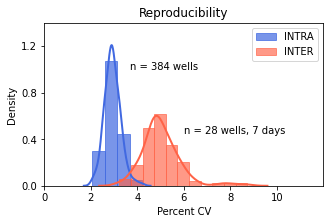

In [3]:
df_w2w = pd.read_csv(f'{root}/data_cv.well.to.well.csv',header=None)
df_d2d = pd.read_csv(f'{root}/data_cv.day.to.day.csv',header=None)

df_w2w.columns = ['cv']
df_d2d.columns = ['cv']

df_w2w['label'] = 'Well-to-Well'
df_d2d['label'] = 'Day-to-Day'

fig, ax = plt.subplots(figsize=(5,3))

ax = sbn.distplot(df_w2w['cv'], hist=True, kde=True, hist_kws={'edgecolor':'royalblue','alpha':0.7}, 
             kde_kws={'linewidth':2}, bins=4, color='royalblue', label='INTRA')
ax = sbn.distplot(df_d2d['cv'], hist=True, kde=True, hist_kws={'edgecolor':'tomato','alpha':0.65}, 
             kde_kws={'linewidth':2}, bins=11, color='tomato', label='INTER')

ax.set_ylabel('Density')
ax.set_xlabel('Percent CV')
ax.set_title('Reproducibility')
plt.text(3.7,1,'n = 384 wells')
plt.text(6,0.45,'n = 28 wells, 7 days')
ax.set_yticks(np.arange(0.0,1.6,0.2))
plt.xlim(0, 12) 
ax.set_xticks(np.arange(0,12,2))
ax.set_yticks(np.arange(0,1.4,0.4))
plt.legend()
plt.show()

fig.savefig(f'{root}/svg_reproducibility.cv.svg')

/var/folders/1d/73pxx39550zdk8hqlvvzxbl40000gn/T/ipykernel_91075/3434952047.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sbn.distplot(df_llod_noxdr, hist=True, kde=False, hist_kws={'edgecolor':'seagreen','alpha':0.7},
/var/folders/1d/73pxx39550zdk8hqlvvzxbl40000gn/T/ipykernel_91075/3434952047.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwasko

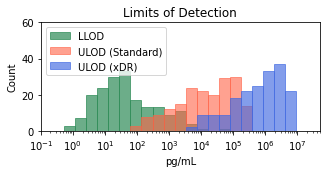

In [5]:
df_lod_xdr = pd.read_csv(f'{root}/data_lod.xDR.csv',header=None)
df_lod_noxdr = pd.read_csv(f'{root}/data_lod.csv',header=None)

fig, ax = plt.subplots(figsize=(5,2))

df_llod_noxdr = df_lod_noxdr.iloc[0]
df_llod_xdr = df_lod_xdr.iloc[0]
df_ulod_noxdr = df_lod_noxdr.iloc[1]
df_ulod_xdr = df_lod_xdr.iloc[1]

logbins = np.logspace(np.log10(0.01),np.log10(100000000),30)
ax = sbn.distplot(df_llod_noxdr, hist=True, kde=False, hist_kws={'edgecolor':'seagreen','alpha':0.7}, 
             kde_kws={'linewidth':5}, bins=logbins, color='seagreen',label='LLOD')
ax = sbn.distplot(df_ulod_noxdr, hist=True, kde=False, hist_kws={'edgecolor':'tomato','alpha':0.6}, 
             kde_kws={'linewidth':5}, bins=logbins, color='tomato', label='ULOD (Standard)')
ax = sbn.distplot(df_ulod_xdr, hist=True, kde=False, hist_kws={'edgecolor':'royalblue','alpha':0.65}, 
             kde_kws={'linewidth':5}, bins=logbins, color='royalblue', label='ULOD (xDR)')

ax.set_xscale('log')
ax.set_xlabel('pg/mL')
ax.set_ylabel('Count')
ax.set_xlim(0.1,50000000)
ax.set_title('Limits of Detection')
ax.set_ylim(0,60)

plt.legend()

fig.savefig(f'{root}/svg_llod.ulod.distribution.svg')